# MTH9879 Homework 6

Assigned: March 07, 2024.
Due March 21, 2024 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\EE}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cI}{\mathcal{I}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually. To receive full credit, you must upload a completed copy of this Jupyter notebook to this [Dropbox File Request link](https://www.dropbox.com/request/8K3rjNicqYdQ7OqQMAXe) by the due date and time.  All python code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color=blue>Please name your submission as <b>9879HW06_Lastname_Firstname.ipynb</b> (noticing the underscores) <br>
e.g., for John Smith, the filename should read 9879HW06_Smith_John. <br> </font>
<font color=red><i>Violation of the naming rule will incur a 20% penalty to the score. </i></font>

<font color="blue">If you encounter problems with Markdown/LaTeX or Jupyter notebook, please contact your TAs: Robert Wei (robert.wei.p72@gmail.com) and Adam Wen (wen.adam@hotmail.com).</font>

### 0. (0 points) 
Read the review article by McAleer and Medeiros and also the nice article by Barndorff-Nielsen et al.

## Comparison of estimators

### Set up `python` environment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rv_estimators import *

### 1. (12 points) 
This assignment uses the `tqBAC` dataset from `tqDataBAC1_20170919.csv` and the RV estimators from the python module `rv_estimators`.

In [2]:
tqBAC = pd.read_csv('tqDataBAC1_20170919.csv')
tqBAC['TIME'] = pd.to_datetime(tqBAC['TIME'])
tqBAC = tqBAC.set_index('TIME')
tqBAC.head()

,SYMBOL,EX,PRICE,SIZE,COND,BID,BIDSIZ,OFR,OFRSIZ,SIGN
TIME,,,,,,,,,,
2017-09-19 09:30:00,BAC,P,24.70,20000,,24.72,6,24.74,100,-1
2017-09-19 09:30:01,BAC,T,24.71,300,,24.72,6,24.74,100,-1
2017-09-19 09:30:01,BAC,P,24.70,100,,24.72,6,24.74,100,-1
2017-09-19 09:30:02,BAC,N,24.73,429950,,24.72,6,24.74,100,1
2017-09-19 09:30:02,BAC,N,24.72,100,,24.72,35,24.74,420,-1


- (a) Consider the BAC trade price series.  Superimpose signature plots of the following estimators with subsampling frequency $q$ from 1 to 20: ZHOU, TSRV, MSRV, KRVTH, KRVC.  Express your results as $\sqrt{RV}$ to make them more intuitive (recall that volatility estimates should be of the order of $2\%$!).
<br>
Pay attention to good aesthetics, adding a proper legend to your plot.
- (b) Repeat part (a) for the BAC mid-quote series.
- (c) Which of these estimators do you recommend and why?  What sub-sampling frequency do you recommend based on these pictures?

#### <font color=blue> Solution 1(a). </font>

In [3]:
p = np.log(tqBAC['PRICE'])
dp = np.diff(p)
mid = np.log((tqBAC['BID'] + tqBAC['OFR'])/2)

In [9]:
# Calculate the Realized Volatility
freq = [i for i in range(1, 21)]
zhou_rv = []
tsrv_rv = []
msrv_rv = []
krvth_rv = []
krvc_rv = []
for q in freq:
    zhou_rv.append(np.sqrt(zhou(p,q)))
    tsrv_rv.append(np.sqrt(tsrv(p,q)))
    msrv_rv.append(np.sqrt(msrv(p,q)))
    krvth_rv.append(np.sqrt(krvth(p,q)))
    krvc_rv.append(np.sqrt(krvc(p,q)))

Text(0.5, 1.0, 'Signature Plots for Different Estimators')

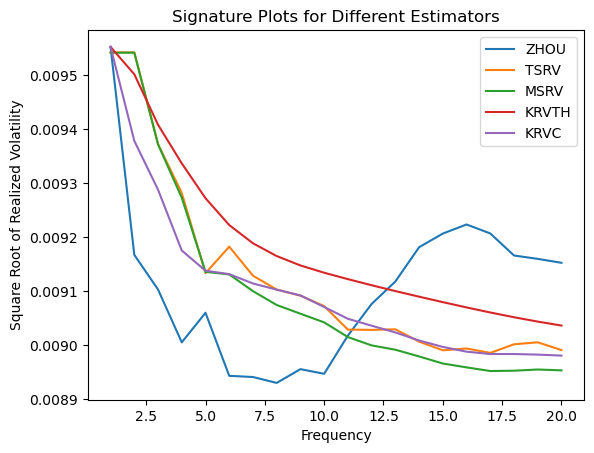

In [11]:
# Make the Plots
plt.plot(freq,zhou_rv,label='ZHOU')
plt.plot(freq,tsrv_rv,label='TSRV')
plt.plot(freq,msrv_rv,label='MSRV')
plt.plot(freq,krvth_rv,label='KRVTH')
plt.plot(freq,krvc_rv,label='KRVC')
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("Square Root of Realized Volatility")
plt.title("Signature Plots for Different Estimators")

#### <font color=blue> Solution 1(b). </font>

In [12]:
# Calculate the Realized Volatility for mid quotes
freq = [i for i in range(1, 21)]
zhou_rv_mid = []
tsrv_rv_mid = []
msrv_rv_mid = []
krvth_rv_mid = []
krvc_rv_mid = []
for q in freq:
    zhou_rv_mid.append(np.sqrt(zhou(mid,q)))
    tsrv_rv_mid.append(np.sqrt(tsrv(mid,q)))
    msrv_rv_mid.append(np.sqrt(msrv(mid,q)))
    krvth_rv_mid.append(np.sqrt(krvth(mid,q)))
    krvc_rv_mid.append(np.sqrt(krvc(mid,q)))

Text(0.5, 1.0, 'Signature Plots for Different Estimators with Mid Quote')

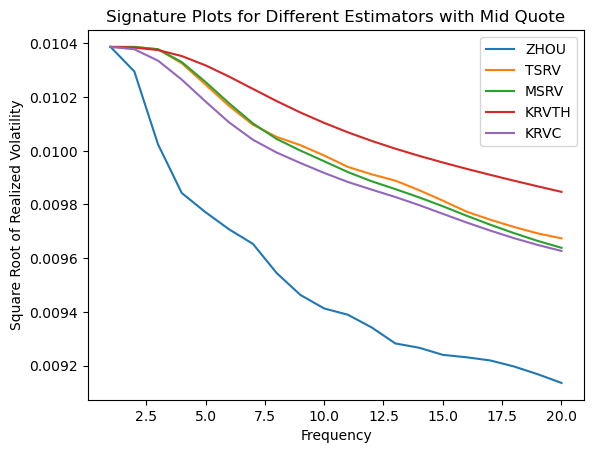

In [13]:
# Make the Plots
plt.plot(freq,zhou_rv_mid,label='ZHOU')
plt.plot(freq,tsrv_rv_mid,label='TSRV')
plt.plot(freq,msrv_rv_mid,label='MSRV')
plt.plot(freq,krvth_rv_mid,label='KRVTH')
plt.plot(freq,krvc_rv_mid,label='KRVC')
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("Square Root of Realized Volatility")
plt.title("Signature Plots for Different Estimators with Mid Quote")

#### <font color=blue> Solution 1(c). </font>

TSRV, MSRV and two KRV methods are all good to use because they have similar performance and are all stable. However, ZHOU estimator's realized volatility will sometimes increase after the frequency increases. I will choose sub-sampling frequency to be 5, because the value of realized volatility starts to stablize when $q\geq 5$

## The Hayashi-Yoshida estimator

### 2. (2 points) 
Show that when two time series $p^{(1)}$ and $p^{(2)}$ are synchronous, the Hayashi-Yoshida estimator coincides with the realized covariance estimator.

### <font color=blue> Solution 2. </font>

Hayashi-Yoshida Estimator is expressed as: 
$$HY_t=\sum_{i \leq t}\,\sum_{j \leq t}\,(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_j-p^{(2)}_{j-1})\,v_{ij}$$
When the two time series are synchronous, it means that these time series move at a same index set, which means $v_{ij}=1$ when $i=j$ and $v_{ij}=0$ when $i\neq j$ because the intervals $[t_{i-1},t_{i}]$ and $[t_{j-1},t_{j}]$ fully overlaps.<br>
As a result, $$HY_t=\sum_{i \leq t}\,(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_i-p^{(2)}_{i-1})$$ and this estimator is exactly the realized covariance estimator. It should be mentioned that we did not do normalization here.

## Fulvio Corsi's HAR-RV model

The dataframe `rv2008` contains estimates of realized variance from Oxford Realized Library and the VIX time series from Yahoo!

In [15]:
import statsmodels.formula.api as sm
import datetime

rv2008 = pd.read_csv('rv2008.csv', index_col=0, header=0)
rv2008.index = [datetime.datetime.strptime(str(date), "%Y%m%d") for date in rv2008.index.values]

Here's how the data looks:

In [16]:
rv2008

,spx,dji,ixic,vix
2008-01-02,0.000112,0.000092,0.000154,23.170000
2008-01-03,0.000052,0.000054,0.000080,22.490000
2008-01-04,0.000138,0.000123,0.000168,23.940001
2008-01-07,0.000197,0.000144,0.000363,23.790001
2008-01-08,0.000198,0.000144,0.000289,25.430000
...,...,...,...,...
2008-12-23,0.000256,0.000287,0.000205,45.020000
2008-12-24,0.000037,0.000054,0.000032,44.209999
2008-12-26,0.000043,0.000066,0.000027,43.380001
2008-12-29,0.000125,0.000125,0.000121,43.900002


### 3. (12 points)

- (a) Superimpose plots of the three time series `log(spx)`, `log(dji)`, and`log(ixic)`.  Pay proper attention to aesthetics.
- (b) Now estimate the HAR model on the three time series `log(spx)`, `log(dji)`, and `log(ixic)`.  
- (c) How similar are the regression coefficients between series?  Which coefficient has the greatest weight in each case?
- (d) Plot `log(spx)` and superimpose a plot of `log(vix)`, adding a scale on the right hand axis. Comment on the resulting plot.


### <font color=blue> Solution 3(a). </font>

Text(0, 0.5, 'Log RV')

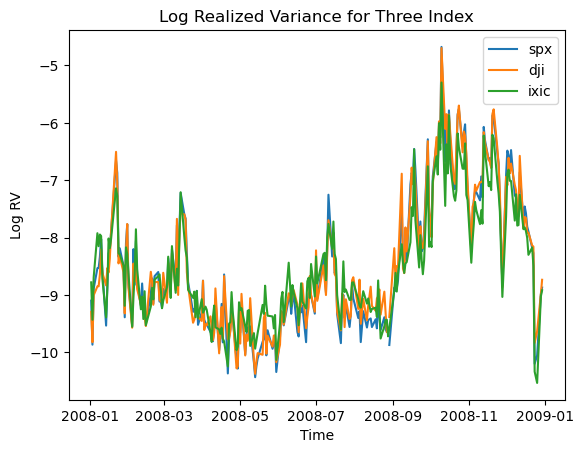

In [19]:
# Plot the log realized volatility in one graph
plt.plot(np.log(rv2008['spx']),label='spx')
plt.plot(np.log(rv2008['dji']),label='dji')
plt.plot(np.log(rv2008['ixic']),label='ixic')
plt.legend()
plt.title("Log Realized Variance for Three Index")
plt.xlabel("Time")
plt.ylabel("Log RV")

### <font color=blue> Solution 3(b). </font>

In [20]:
import statsmodels.formula.api as sm

##### SPX

In [21]:
# take h = 1 in the HAR-RV model
# y = RV_{t+h}
# rv1 = RV_t
# rv5 = 5-day moving average of RV
# rv22 = 22-day moving average of RV
spx = rv2008['spx'].dropna()
spx1 = np.array(np.log(spx))
y = spx1[22:]
rv1 = spx1[21:-1]
rv5 = np.array(pd.DataFrame(spx1[17:]).rolling(5).mean()[5-1:-1])
rv22 = np.array(pd.DataFrame(spx1[:]).rolling(22).mean()[22-1:-1])

# regress y over rv1 + rv5 + rv22
data = {'y': y, 'rv1': rv1, 'rv5': rv5, 'rv22': rv22}
fit_har = sm.ols('y ~ rv1 + rv5 + rv22', data=data).fit()

print(fit_har.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     297.0
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           6.93e-77
Time:                        00:15:40   Log-Likelihood:                -181.64
No. Observations:                 223   AIC:                             371.3
Df Residuals:                     219   BIC:                             384.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4880      0.301     -1.620      0.1

##### DJI

In [22]:
# take h = 1 in the HAR-RV model
# y = RV_{t+h}
# rv1 = RV_t
# rv5 = 5-day moving average of RV
# rv22 = 22-day moving average of RV
dji = rv2008['dji'].dropna()
dji1 = np.array(np.log(dji))
y = dji1[22:]
rv1 = dji1[21:-1]
rv5 = np.array(pd.DataFrame(dji1[17:]).rolling(5).mean()[5-1:-1])
rv22 = np.array(pd.DataFrame(dji1[:]).rolling(22).mean()[22-1:-1])

# regress y over rv1 + rv5 + rv22
data = {'y': y, 'rv1': rv1, 'rv5': rv5, 'rv22': rv22}
fit_har = sm.ols('y ~ rv1 + rv5 + rv22', data=data).fit()

print(fit_har.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     282.8
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           4.97e-75
Time:                        00:26:22   Log-Likelihood:                -180.12
No. Observations:                 223   AIC:                             368.2
Df Residuals:                     219   BIC:                             381.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4463      0.303     -1.474      0.1

##### IXIC

In [23]:
# take h = 1 in the HAR-RV model
# y = RV_{t+h}
# rv1 = RV_t
# rv5 = 5-day moving average of RV
# rv22 = 22-day moving average of RV
ixic = rv2008['ixic'].dropna()
ixic1 = np.array(np.log(ixic))
y = ixic1[22:]
rv1 = ixic1[21:-1]
rv5 = np.array(pd.DataFrame(ixic1[17:]).rolling(5).mean()[5-1:-1])
rv22 = np.array(pd.DataFrame(ixic1[:]).rolling(22).mean()[22-1:-1])

# regress y over rv1 + rv5 + rv22
data = {'y': y, 'rv1': rv1, 'rv5': rv5, 'rv22': rv22}
fit_har = sm.ols('y ~ rv1 + rv5 + rv22', data=data).fit()

print(fit_har.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     221.6
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           3.36e-66
Time:                        00:27:16   Log-Likelihood:                -164.63
No. Observations:                 224   AIC:                             337.3
Df Residuals:                     220   BIC:                             350.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6024      0.352     -1.710      0.0

### <font color=blue> Solution 3(c). </font>

The regression coefficient between series are similar, with a negative but not significant intercept, positive and significant coefficient of rv1 and rv5, and a positive but not significant coefficient of rv22. <br>
In SPX and IXIC cases, the coefficient with greatest weight is rv1, in DJI case, the coefficient with greatest weight is rv5.

### <font color=blue> Solution 3(d). </font>

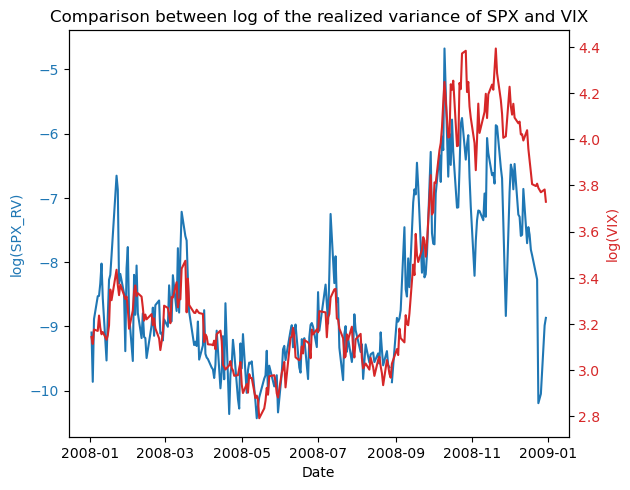

In [26]:
# Calculate the logarithm of the 'spx' and 'vix' columns
rv2008['log_spx'] = np.log(rv2008['spx'])
rv2008['log_vix'] = np.log(rv2008['vix'])

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('log(SPX_RV)', color=color)
ax1.plot(rv2008.index, rv2008['log_spx'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the log(VIX) data
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('log(VIX)', color=color)
ax2.plot(rv2008.index, rv2008['log_vix'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure a neat layout
plt.title('Comparison between log of the realized variance of SPX and VIX')
plt.show()

We can see that VIX and the logarithm of realized variance of SPX is highly correlated with the logarithm of VIX, thus we can say VIX is a good indicator for realized variance.